In [2]:
# People in Space

# imports
import requests
import json

#API URL
peopleURL = "http://api.open-notify.org/astros.json"

# make a request with the request library
peoplerequest = requests.get(peopleURL)

# strip off json attachment from our response
peopledata = peoplerequest.json()

people = peopledata.get('people')
num = peopledata.get('number')

names = []
crafts = []
for person in people:
    names.append(person.get('name'))
    crafts.append(person.get('craft'))

# display space data
print("There are "+ str(num) + " people in space.\n")
print("People and Craft:\n")
for i in range(len(names)):
    print(names[i] + " : " + crafts[i])

There are 14 people in space.

People and Craft:

Kjell Lindgren : ISS
Bob Hines : ISS
Samantha Cristoforetti : ISS
Jessica Watkins : ISS
Cai Xuzhe : Tiangong
Chen Dong : Tiangong
Liu Yang : Tiangong
Sergey Prokopyev : ISS
Dmitry Petelin : ISS
Frank Rubio : ISS
Nicole Mann : Endurance
Josh Cassada : Endurance
Koichi Wakata : Endurance
Anna Kikina : Endurance


In [3]:
#Picture of the day

#imports
import requests
import json
from PIL import Image
import urllib.request

#API URL
NASA_API = "https://api.nasa.gov/planetary/apod?"
NASA_KEY = "api_key=" + "ZqrQl0M6SGoFZNND3HphsebfoAVJ8AfDjA7hVpgj"

# make a call to NASAAPI with our key
picrequest = requests.get(NASA_API + NASA_KEY)

# json
picdata = picrequest.json()


picURL = picdata["url"]
picTitle = picdata["title"]

# file name
filename = "./dailypic.jpg"

# save URL to file
urllib.request.urlretrieve(picURL, filename)

#Resize image
 
# Opens a image in RGB mode
im = Image.open(filename)
 
# Size of the image in pixels (size of original image)
width, height = im.size

# resize
new_width = 500
new_height = new_width*(height/width)
newsize = (new_width, int(new_height))


im.thumbnail(newsize)
# Shows the image in image viewer
im.save(filename, "JPEG")


In [4]:
#Solar System Bodies

#imports
import requests
import json
from PIL import Image
import urllib.request

#API URL
SS_API = "https://api.le-systeme-solaire.net/rest/bodies/"

# make a call to NASAAPI with our key
bodiesrequest = requests.get(SS_API)

# json
bodydata = bodiesrequest.json()


bodies = bodydata.get('bodies')

names = []

for body in bodies:
    if body.get('isPlanet') and body.get('englishName') != "Earth":
        names.append(body.get('englishName'))


# display space data

print("Planets:\n")
for i in range(len(names)):
    print(names[i])

Planets:

Uranus
Neptune
Jupiter
Mars
Mercury
Saturn
Venus


3.30114e+23
2439400.0


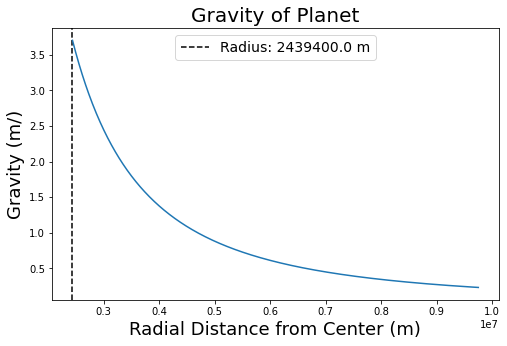

In [12]:
planet = "Mercury"
# API URL
SS_API = "https://api.le-systeme-solaire.net/rest/bodies/"

# make API call and log mass
bodiesrequest = requests.get(SS_API)
bodydata = bodiesrequest.json()
bodies = bodydata.get('bodies')
mass = float()
radius = float()
for body in bodies:
    if body.get('englishName') == planet:
        massdata = body.get('mass')
        mass = massdata.get('massValue')*(10**massdata.get('massExponent'))
        radius = body.get('meanRadius')*1000

G_Constant = 6.6743*(10**(-11)) #m^3/(kg s^2)
#return mass
print(mass) #kg
print(radius) #m

radial_max = 4*radius

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

plt.figure(figsize=(8,5))
sns.set
inc_r = (radial_max/1000)

r = np.arange(radius, radial_max, inc_r)
g = G_Constant*(mass/(r**2))

plt.title("Gravity of Planet", fontsize=20)
plt.xlabel("Radial Distance from Center (m)", fontsize=18)
plt.ylabel("Gravity (m/)", fontsize=18)
plt.axvline(radius, color="black", ls="--", label=f'Radius: {radius} m')
plt.legend(loc='upper center', fontsize=14)
plt.plot(r, g)

#return mass, radius

